This is version 3 of the notebook using the dataset with uncollapsed runs.

# TODO

- rerun manova and put it into function
- ADD THOSE DATA POINTS
- dendrogram: which groups are closest
- ask Cory whether inverse PCA transformation can be used to get transformation for future data points to be comparable (the 'index' idea)
- INVESTIGATE this >1 correlation...
- How does gait/GI change with age?

# NOTES
- What's Stefano's formula for PCA? (we have different var exp)
- When comparing L to R, correlation is a bad metric because it depends on the ordering (?).
- my response really is 'Group', not 'NVC' (this is changes from version 0 and first drafts of version 2) - OR IS IT?

# DATA INFO
-In mouse number the first digit is the cage number

In [25]:
%load_ext autoreload
%autoreload 2
import warnings; warnings.simplefilter('ignore')

import pandas as pd
import numpy as np
from vacou import *
from plots import *
from sklearn.metrics.pairwise import pairwise_distances

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)
sns.set(style="white")
#sns.set(font="monospace")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
data_fp = '/P/vacou/data/SS31_gait_data_for_PCA.tsv'
sep_runs_data_fp = '/P/vacou/data/all_separate_runs.csv'
#d_orig = pd.read_csv(data_fp, sep='\t')
response_column = 'Group'

In [27]:
#d, md, full_df = preprocess_vc(data_fp, version = 2, use_vars_fp='data/use_variables.csv')

In [28]:
d, md, full_df = preprocess_vc(sep_runs_data_fp, version = 3, use_vars_fp='data/use_variables.csv')

In [29]:
print(d.shape, md.shape, full_df.shape)

(111, 112) (111, 4) (111, 494)


In [30]:
#d.to_csv('data/data_ss31.tsv', sep='\t')
#md.to_csv('data/md.tsv', sep='\t')
#full_df.to_csv('data/data_ss31_with_md.tsv', sep="\t")

# Exploratory

In [31]:
print('Take a look at some data columns')
full_df.columns.tolist()[:20]

Take a look at some data columns


['Group',
 'Group_Type',
 'Group_Description',
 'Animal',
 'Time_Point',
 'Time_Point_Description',
 'Trial',
 'Trial_Description',
 'Run',
 'Run_Description',
 'Run_Duration_(s)',
 'Run_Average_Speed_(cm/s)',
 'Run_Maximum_Variation_(%)',
 'Camera_Gain_(dB)',
 'Green_Intensity_Threshold',
 'Ceiling_Light_(V)',
 'Walkway_Light_(V)',
 'X-Unit_(mm/pixel)',
 'Y-Unit_(mm/pixel)',
 'WalkWay_Length_(cm)']

In [32]:
print('Summarise data')
d.describe()

Summarise data


,Run_Average_Speed_(cm/s),Run_Average_Speed_(cm/s),RF_StandIndex_Mean,RF_MaxContactAt_(%)_Mean,RF_Swing_(s)_Mean,RF_SwingSpeed_(cm/s)_Mean,RF_StrideLength_(cm)_Mean,RF_StepCycle_(s)_Mean,RF_DutyCycle_(%)_Mean,RF_SingleStance_(s)_Mean,...,LF_BodySpeedVariation_(%)_Mean,LH_Stand_(s)_Mean,LH_StandIndex_Mean,LH_MaxContactAt_(%)_Mean,LH_Swing_(s)_Mean,LH_SwingSpeed_(cm/s)_Mean,LH_StrideLength_(cm)_Mean,LH_StepCycle_(s)_Mean,LH_DutyCycle_(%)_Mean,LH_SingleStance_(s)_Mean
count,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,...,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000
mean,14.584914,14.584914,-2.908800,42.021234,0.162932,44.196942,6.323757,0.398405,59.129395,0.157979,...,30.035065,0.283630,-6.335140,36.251656,0.119817,53.010311,6.096168,0.396463,67.084317,0.121410
std,4.523834,4.523834,0.987070,8.979002,0.038863,8.410696,0.685844,0.078260,4.627810,0.032483,...,19.045127,0.088077,2.099504,10.259607,0.020920,7.570878,0.766086,0.089811,6.490651,0.024038
min,6.331959,6.331959,-6.193595,21.103484,0.097347,27.469878,4.412604,0.234630,48.971029,0.087002,...,2.777169,0.138116,-11.217751,14.200235,0.066559,29.982542,3.852942,0.235629,52.196785,0.072875
25%,11.736628,11.736628,-3.321232,35.149174,0.138226,38.360965,5.790312,0.344030,55.643951,0.137780,...,17.317494,0.213965,-8.117294,27.797989,0.103484,48.592158,5.518172,0.339584,63.340375,0.104817
50%,13.854303,13.854303,-2.692116,41.737220,0.157248,44.248726,6.362632,0.401859,58.889488,0.153001,...,26.453840,0.273563,-6.043389,35.960144,0.117805,52.866320,6.107221,0.386884,68.040314,0.119809
75%,16.996631,16.996631,-2.224076,49.631609,0.177838,47.910743,6.808816,0.449784,62.610761,0.171948,...,36.656918,0.334466,-4.643683,44.255033,0.135417,57.481433,6.603696,0.445324,71.891407,0.133335
max,27.920288,27.920288,-1.436407,66.492026,0.397888,73.913177,7.918933,0.640329,71.386043,0.286213,...,127.299894,0.614022,-1.520474,62.801402,0.175968,77.921686,7.747798,0.788744,80.350844,0.197866


In [33]:
print('Take a look at metadata')
md.head()

Take a look at metadata


Group  Animal     Run      Trial
Group Animal                                 
AC    1.2       AC     1.2  Run004  Trial0022
      1.2       AC     1.2  Run010  Trial0022
      1.2       AC     1.2  Run017  Trial0022
      1.2       AC     1.2  Run022  Trial0022
      1.3       AC     1.3  Run011  Trial0023

In [34]:
print('How many observations are in each group?')
pd.DataFrame(md.Group.value_counts())

How many observations are in each group?


,Group
AT,67
YC,30
AC,14


# Top important features

### highest variance selection

In [35]:
selected_v, variances = sel_var(normalize_pd(d, 0), 0.001)

In [36]:
print("Features with highest variance")
pd.DataFrame(variances.sort_values(ascending=False)[:15], columns = ['variance (after normalisation)'])

Features with highest variance


,variance (after normalisation)
LH_InitialDualStance_(s)_Mean,0.003279
LF_BodySpeedVariation_(%)_Mean,0.002567
LF_BodySpeedVariation_(%)_Mean,0.002567
RF_BodySpeedVariation_(%)_Mean,0.002412
RF_BodySpeedVariation_(%)_Mean,0.002412
LH_BodySpeedVariation_(%)_Mean,0.002412
RH_BodySpeedVariation_(%)_Mean,0.002378
RH_BodySpeedVariation_(%)_Mean,0.002378
RH_TerminalDualStance_(s)_Mean,0.002375
RH_TerminalDualStance_(s)_Mean,0.002375


### f classification selection (anova for all variables)

In [37]:
selected_a = sel_anova(normalize_pd(d, 0), md[response_column], k=15, mode = 'classif')

In [38]:
print("Features selected by f_regression")
pd.DataFrame(selected_a.columns)

Features selected by f_regression


,0
0,RF_StandIndex_Mean
1,RF_DutyCycle_(%)_Mean
2,RF_SingleStance_(s)_Mean
3,LF_Stand_(s)_Mean
4,LF_StandIndex_Mean
5,FP_Stand_(s)_Mean
6,FP_StandIndex_Mean
7,FP_DutyCycle_(%)_Mean
8,FP_SingleStance_(s)_Mean
9,RF_StandIndex_Mean


### mutual information classification selection

In [39]:
selected_m = sel_mi(normalize_pd(d, 0), md[response_column], k=15)

In [40]:
print("Features selected by mutual_info_regression")
pd.DataFrame(selected_m.columns)

Features selected by mutual_info_regression


,0
0,RF_SingleStance_(s)_Mean
1,RH_StepCycle_(s)_Mean
2,RH_InitialDualStance_(s)_Mean
3,LF_Stand_(s)_Mean
4,LF_StandIndex_Mean
5,LH_Stand_(s)_Mean
6,LH_StepCycle_(s)_Mean
7,FP_SingleStance_(s)_Mean
8,RF_SingleStance_(s)_Mean
9,RH_StepCycle_(s)_Mean


### Comparison of feature reduction methods

In [41]:
print("Number of selected features that overlap between methods (out of 15):")
print(' - var-f_reg:', str(sum([i in selected_a.columns.tolist()
                              for i in variances.sort_values(ascending=False)[:15].index.tolist()])),
                             "features.")
print(' - var-mi_reg:', str(sum([i in selected_m.columns.tolist()
                              for i in variances.sort_values(ascending=False)[:15].index.tolist()])),
                             "features.")
print(' - f_reg-mi_reg:', str(sum([i in selected_a.columns.tolist()
                              for i in selected_m.columns.tolist()])),
                             "features. \n")

Number of selected features that overlap between methods (out of 15):
 - var-f_reg: 0 features.
 - var-mi_reg: 2 features.
 - f_reg-mi_reg: 7 features. 



Accuracy for classifier param grid for response variable Group


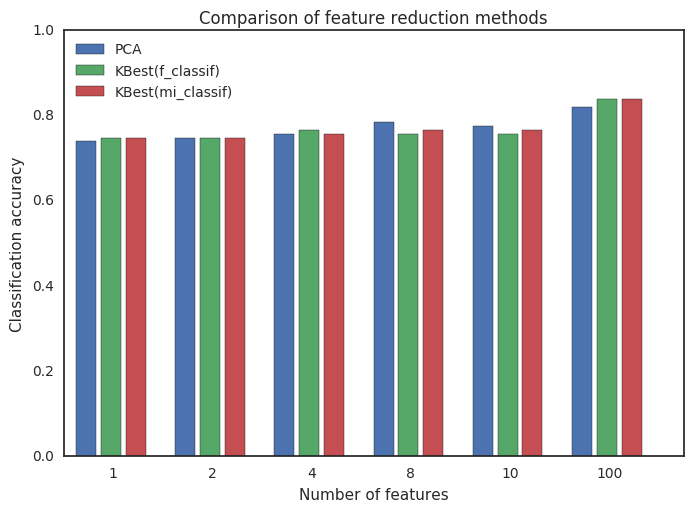

In [42]:
# regression problems:
#compare_dim_red_methods(normalize_pd(d, 0), round(md[response_column], 0), mode='regression')

# classification:
print('Accuracy for classifier param grid for response variable', response_column)
compare_dim_red_methods(normalize_pd(d, 0), md[response_column], mode='classif')

# PCA

In [43]:
comps, exvar, _ = get_pc(normalize_pd(d,0, 'normalize'))
comps.to_csv('data/PCs.tsv', sep='\t')

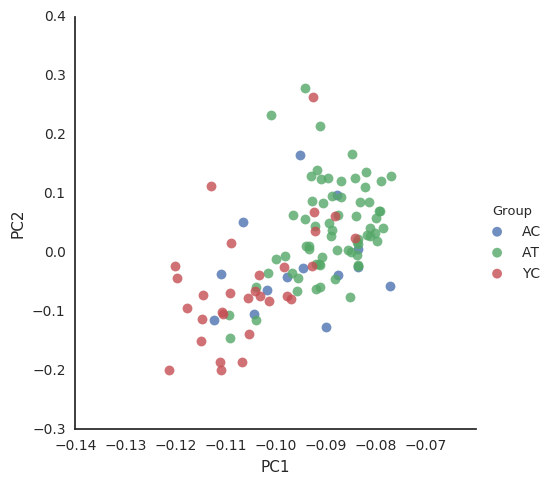

In [44]:
plot_comps = get_plot_comps(comps, md)
p2 = sns.lmplot(x='PC1', y='PC2', hue='Group', data=plot_comps, ci=None, fit_reg=False,
               scatter_kws={"s":50})

In [45]:
print('Variance explained')
pd.DataFrame(exvar).T

Variance explained


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC102,PC103,PC104,PC105,PC106,PC107,PC108,PC109,PC110,PC111
0,0.791796,0.08465,0.034039,0.020228,0.013603,0.010719,0.007641,0.006431,0.005946,0.003421,...,6.783153e-33,6.783153e-33,6.783153e-33,6.783153e-33,6.783153e-33,6.783153e-33,6.783153e-33,6.783153e-33,6.783153e-33,2.758665e-34


In case of more samples, there doesn't seem to be much of a difference at all - BUT, perhaps there's a trend?

In [46]:
#p2 = sns.lmplot(x='PC1', y='PC2', hue='Trial', data=plot_comps.sort_values('Trial').iloc[:10,:],
#                ci=None, fit_reg=False, scatter_kws={"s":50})#, y_jitter=0.01, x_jitter=0.01)

In [47]:
# clusterplots for samples 1) PC3, PCall, all_var

In [48]:
palette=sns.color_palette('colorblind', len(md.Group.drop_duplicates()))
if not 'Colour' in md.columns:
    md.insert(1, 'Colour', md.Group)
    for i,g in enumerate(md.Colour.drop_duplicates()):
        md.Colour[md.Colour == g] = [palette[i] for c in range(sum(md.Colour == g))]

In [60]:
comps.index

MultiIndex(levels=[['AC', 'AT', 'YC'], [1.1, 1.2, 1.3]],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]],
           names=['Group', 'Animal'])

Distances between mice based on 5 variables or PCs. Dendrograms illustrate clustering of mice.


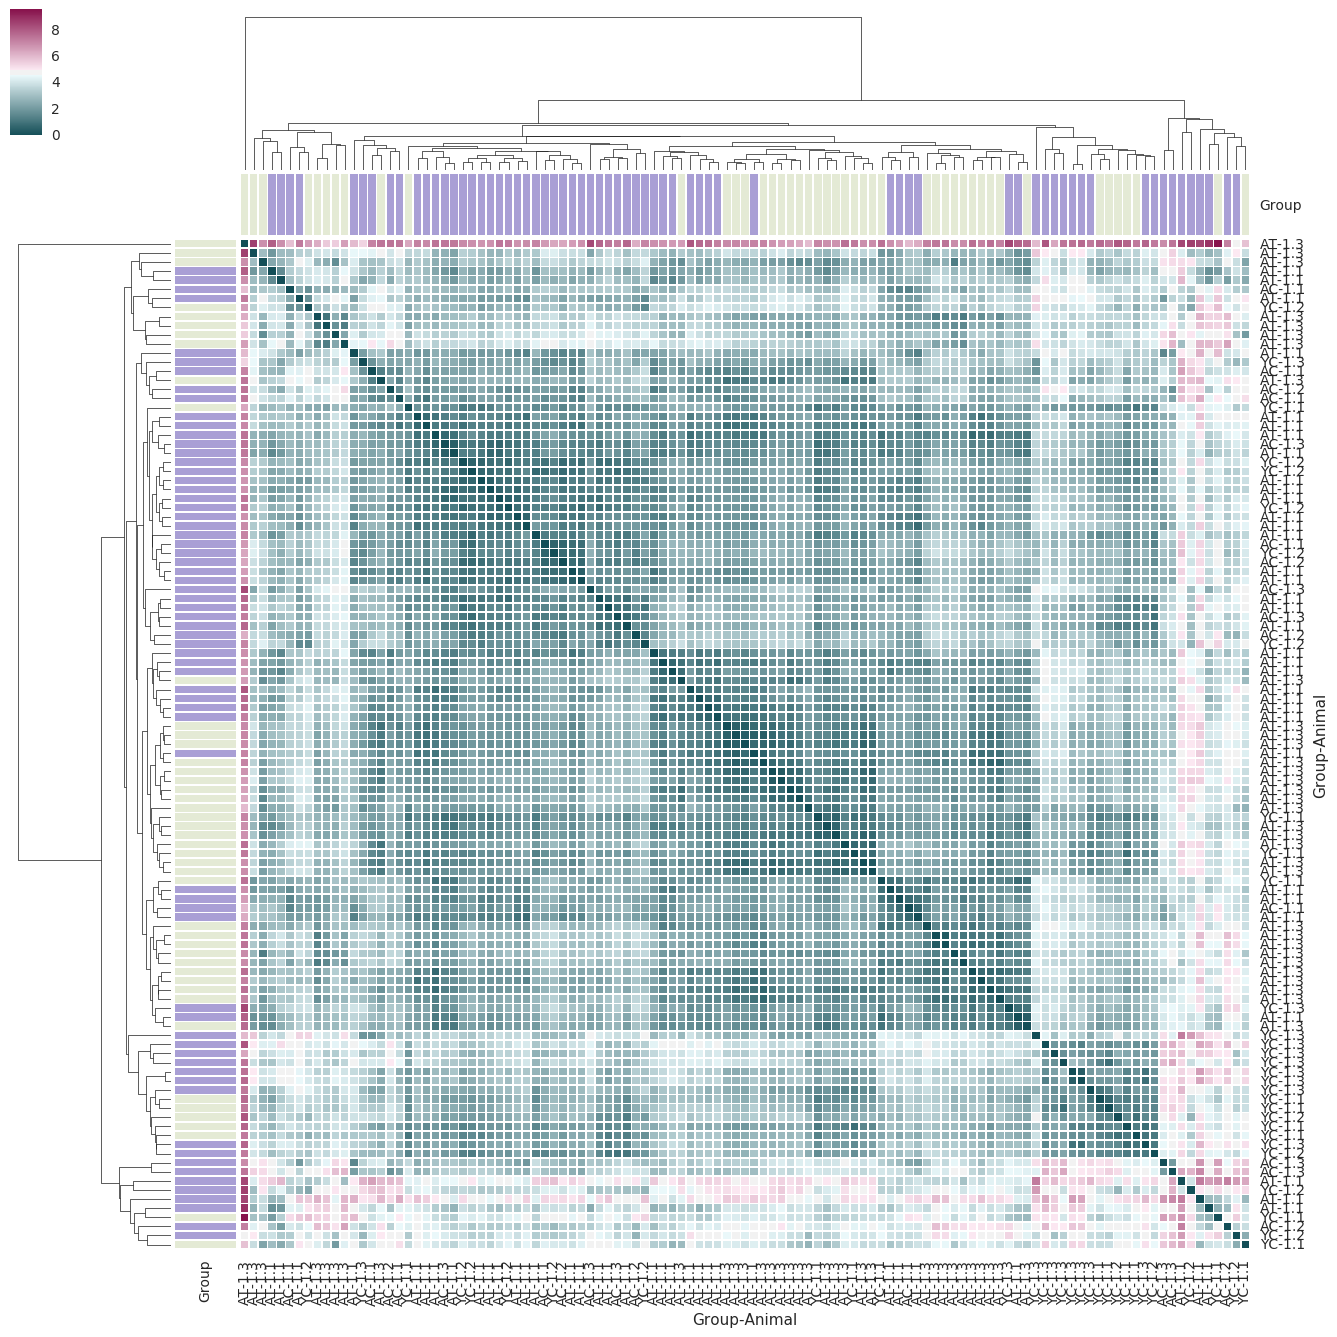

In [54]:
print('Distances between mice based on', 5, 'variables or PCs. Dendrograms illustrate clustering of mice.')
D = pd.DataFrame(pairwise_distances(comps.ix[:, :5],metric='mahalanobis'),
                columns = comps.index, index = comps.index)
#sns.clustermap(x);
p3 = distance_matrix_plots(D, "Group", figsize=(16,16));

# Differences between groups

### Is there any difference between all groups? Cluster separation - ?

### Is there any difference between all groups? Compare with one variable: Gait Index - ANOVA

In [61]:
GI = comps.ix[:, :1].rename(columns={'PC1': 'GI'})
GI.to_csv('data/GI.tsv', sep="\t")
GI['GI_scaled'] = scale(GI['GI'])
GI.describe()

,GI,GI_scaled
count,111.000000,1.110000e+02
mean,-0.094268,7.646536e-16
std,0.011117,1.004535e+00
min,-0.121330,-2.445423e+00
25%,-0.102479,-7.419544e-01
50%,-0.092160,1.905541e-01
75%,-0.084818,8.539933e-01
max,-0.077063,1.554740e+00


In [62]:
[print(i.rstrip()) for i in anovaR('data/GI.tsv', 'GI~Group')];

             Df   Sum Sq   Mean Sq F value   Pr(>F)
Group         2 0.005527 0.0027636      37 5.76e-13 ***
Residuals   108 0.008066 0.0000747
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


### Is there any difference between all groups? Comparison with multiple variables - MANOVA. 

Done on PCs - perhaps useful for global difference assessment, surely not for testing each variable.

http://www.sthda.com/english/wiki/manova-test-in-r-multivariate-analysis-of-variance

If the global multivariate test is significant, we conclude that the corresponding effect (treatment; here: group) is significant.

In [63]:
[print(i.rstrip()) for i in manovaR()['summary']];

           Df  Pillai approx F num Df den Df    Pr(>F)
Group       2 0.45471   10.495      6    214 3.344e-10 ***
Residuals 108
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


**RESULTS**: There seems to be a significant global difference between groups.

The next question is to determine if which of the variables does the treatment affect. In other words, we want to identify the specific dependent variables that contributed to the significant global effect. To answer this question, we can use one-way ANOVA (or univariate ANOVA) to examine separately each dependent variable.

Which variables are different between groups?

In [64]:
[print(i.rstrip()) for i in manovaR()['summary.aov']];

 Response PC1 :
             Df    Sum Sq    Mean Sq F value    Pr(>F)
Group         2 0.0055272 0.00276360  37.002 5.761e-13 ***
Residuals   108 0.0080663 0.00007469
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

 Response PC2 :
             Df  Sum Sq  Mean Sq F value    Pr(>F)
Group         2 0.19327 0.096634  13.001 8.724e-06 ***
Residuals   108 0.80272 0.007433
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

 Response PC3 :
             Df  Sum Sq  Mean Sq F value   Pr(>F)
Group         2 0.09821 0.049104  5.8973 0.003709 **
Residuals   108 0.89925 0.008326
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



### Is there a difference between any two groups? Comparison with multiple variables - MANOVA. 

In [65]:
set(comps.index.get_level_values('Group'))

{'AC', 'AT', 'YC'}

In [66]:
[print(i.rstrip()) for i in manovaR(groups = ['AC', 'AT'])['summary']];
print('\n------\n Which variables contribute?\n')
[print(i.rstrip()) for i in manovaR(groups = ['AC', 'AT'])['summary.aov']];

          Df  Pillai approx F num Df den Df   Pr(>F)
Group      1 0.14721   4.4306      3     77 0.006306 **
Residuals 79
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

------
 Which variables contribute?

 Response PC1 :
            Df    Sum Sq    Mean Sq F value  Pr(>F)
Group        1 0.0004335 0.00043351  6.6436 0.01181 *
Residuals   79 0.0051550 0.00006525
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

 Response PC2 :
            Df  Sum Sq  Mean Sq F value  Pr(>F)
Group        1 0.04339 0.043388   6.627 0.01191 *
Residuals   79 0.51722 0.006547
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

 Response PC3 :
            Df  Sum Sq   Mean Sq F value  Pr(>F)
Group        1 0.03100 0.0309974   4.004 0.04883 *
Residuals   79 0.61159 0.0077416
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



In [67]:
[print(i.rstrip()) for i in manovaR(groups = ['AC', 'YC'])['summary']];
print('\n------\n Which variables contribute?\n')
[print(i.rstrip()) for i in manovaR(groups = ['AC', 'YC'])['summary.aov']];

          Df  Pillai approx F num Df den Df  Pr(>F)
Group      1 0.19294   3.1875      3     40 0.03389 *
Residuals 42
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

------
 Which variables contribute?

 Response PC1 :
            Df    Sum Sq    Mean Sq F value   Pr(>F)
Group        1 0.0009917 0.00099169  9.3673 0.003841 **
Residuals   42 0.0044464 0.00010587
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

 Response PC2 :
            Df  Sum Sq   Mean Sq F value Pr(>F)
Group        1 0.00984 0.0098432  1.1128 0.2975
Residuals   42 0.37151 0.0088454

 Response PC3 :
            Df  Sum Sq   Mean Sq F value Pr(>F)
Group        1 0.00152 0.0015186  0.1803 0.6733
Residuals   42 0.35372 0.0084219



In [68]:
[print(i.rstrip()) for i in manovaR(groups = ['YC', 'AT'])['summary']];
print('\n------\n Which variables contribute?\n')
[print(i.rstrip()) for i in manovaR(groups = ['YC', 'AT'])['summary.aov']];

          Df  Pillai approx F num Df den Df    Pr(>F)
Group      1 0.46525   26.971      3     93 1.224e-12 ***
Residuals 95
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

------
 Which variables contribute?

 Response PC1 :
            Df    Sum Sq   Mean Sq F value    Pr(>F)
Group        1 0.0055131 0.0055131  80.192 2.827e-14 ***
Residuals   95 0.0065311 0.0000687
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

 Response PC2 :
            Df  Sum Sq  Mean Sq F value    Pr(>F)
Group        1 0.18047 0.180467  23.921 4.083e-06 ***
Residuals   95 0.71671 0.007544
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

 Response PC3 :
            Df  Sum Sq  Mean Sq F value   Pr(>F)
Group        1 0.08581 0.085808  9.7837 0.002338 **
Residuals   95 0.83320 0.008770
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



### * is neurovascular decoupling different between groups?

# Left side - right side relationships
Values in the table are correlations between each left-side gait parameter and the corresponding right-seid gait parameter. Lowest correlations are sorted first.

In [55]:
corrs = corr_L_R(full_df)
#corrs.groupby(corrs.index.get_level_values(0)).apply(lambda x: x.sort_values('correlation', ascending=True))
corrs.sort_values('correlation', ascending=True).head(10)

,group,parameter,correlation
73,ss31 aged injected,H_BodySpeed_(cm/s)_Mean,0.001925
12,Aged Ctrl,F_MinIntensity_Mean,0.002450
108,young ctrl,F_MinIntensity_Mean,0.002692
49,ss31 aged injected,F_BodySpeed_(cm/s)_Mean,0.002911
132,young ctrl,H_MinIntensity_Mean,0.004482
97,young ctrl,F_BodySpeed_(cm/s)_Mean,0.006507
121,young ctrl,H_BodySpeed_(cm/s)_Mean,0.007488
48,ss31 aged injected,F_BodySpeedVariation_(%)_Mean,0.009124
36,Aged Ctrl,H_MinIntensity_Mean,0.010267
1,Aged Ctrl,F_BodySpeed_(cm/s)_Mean,0.012837


In [60]:
corrs.sort_values('correlation', ascending=True).tail(10)

,group,parameter,correlation
56,ss31 aged injected,F_MaxIntensityAt_(%)_Mean,0.682724
119,young ctrl,F_TerminalDualStance_(s)_Mean,0.694058
8,Aged Ctrl,F_MaxIntensityAt_(%)_Mean,0.754061
101,young ctrl,F_MaxContactAt_(%)_Mean,0.769689
143,young ctrl,H_TerminalDualStance_(s)_Mean,0.795289
87,ss31 aged injected,H_PrintWidth_(cm)_Mean,0.817555
98,young ctrl,F_DutyCycle_(%)_Mean,0.819050
99,young ctrl,F_InitialDualStance_(s)_Mean,0.849692
142,young ctrl,H_Swing_(s)_Mean,0.852383
123,young ctrl,H_InitialDualStance_(s)_Mean,1.039210


In [65]:
corrs.groupby('group').apply(lambda x: x.sort_values('correlation', ascending=True).head())\
        .drop('group',1)

parameter  correlation
group                                                             
Aged Ctrl          12             F_MinIntensity_Mean     0.002450
                   36             H_MinIntensity_Mean     0.010267
                   1          F_BodySpeed_(cm/s)_Mean     0.012837
                   25         H_BodySpeed_(cm/s)_Mean     0.018651
                   13          F_PrintArea_(cm²)_Mean     0.020817
ss31 aged injected 73         H_BodySpeed_(cm/s)_Mean     0.001925
                   49         F_BodySpeed_(cm/s)_Mean     0.002911
                   48   F_BodySpeedVariation_(%)_Mean     0.009124
                   92        H_StrideLength_(cm)_Mean     0.013699
                   68        F_StrideLength_(cm)_Mean     0.015067
young ctrl         108            F_MinIntensity_Mean     0.002692
                   132            H_MinIntensity_Mean     0.004482
                   97         F_BodySpeed_(cm/s)_Mean     0.006507
                   121        H_BodySpeed_(cm/s)_Mean     0.007488
                   120  H_BodySpeedVariation_(%)_Mean     0.025727